In [98]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
from pyfonts import load_font
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import imageio as iio
import matplotlib.image as npimg
import matplotlib

In [94]:
url = 'https://understat.com/player/8026'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')
strings = scripts[3].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
# data = elevations['seasons']
# df = pd.json_normalize(data)
# df.info()
data = json.loads(json_data)
shots = pd.DataFrame(data)
shots['date'] = pd.to_datetime(shots['date'],errors='coerce')
shots = shots[shots['season'] == '2024']
shots

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
345,585113,18,SavedShot,0.7580000305175781,0.28299999237060547,0.01701364479959011,Raphinha,a,8026,OpenPlay,2024,LeftFoot,26987,Valencia,Barcelona,1,2,2024-08-17 19:30:00,Lamine Yamal,Pass
346,585116,38,BlockedShot,0.7269999694824218,0.37900001525878907,0.04999781772494316,Raphinha,a,8026,DirectFreekick,2024,LeftFoot,26987,Valencia,Barcelona,1,2,2024-08-17 19:30:00,None,Standard
347,586421,19,SavedShot,0.8830000305175781,0.539000015258789,0.41309571266174316,Raphinha,h,8026,OpenPlay,2024,LeftFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Pedri,Throughball
348,586423,21,MissedShots,0.8869999694824219,0.3370000076293945,0.02947060391306877,Raphinha,h,8026,OpenPlay,2024,LeftFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Álex Balde,Cross
349,586425,27,BlockedShot,0.87,0.28100000381469725,0.03794782608747482,Raphinha,h,8026,FromCorner,2024,LeftFoot,26995,Barcelona,Athletic Club,2,1,2024-08-24 17:00:00,Pedri,TakeOn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,618779,27,SavedShot,0.8159999847412109,0.17299999237060548,0.04572565108537674,Raphinha,a,8026,DirectFreekick,2024,LeftFoot,27226,Las Palmas,Barcelona,0,2,2025-02-22 20:00:00,None,Standard
424,618782,43,BlockedShot,0.7559999847412109,0.524000015258789,0.07833543419837952,Raphinha,a,8026,DirectFreekick,2024,LeftFoot,27226,Las Palmas,Barcelona,0,2,2025-02-22 20:00:00,None,Standard
425,618787,60,MissedShots,0.92,0.509000015258789,0.06556238234043121,Raphinha,a,8026,OpenPlay,2024,Head,27226,Las Palmas,Barcelona,0,2,2025-02-22 20:00:00,Lamine Yamal,Aerial
426,620519,43,BlockedShot,0.745,0.4879999923706055,0.03078578971326351,Raphinha,h,8026,OpenPlay,2024,LeftFoot,27232,Barcelona,Real Sociedad,4,0,2025-03-02 15:15:00,Dani Olmo,Pass


In [52]:
shots['shotType'].unique()

array(['LeftFoot', 'Head', 'RightFoot'], dtype=object)

In [95]:
shots['X'] = shots['X'].astype(float)
shots['Y'] = shots['Y'].astype(float)
shots['X'] = shots['X'] * 100
shots['Y'] = shots['Y'] * 100
shots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 345 to 427
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               83 non-null     object        
 1   minute           83 non-null     object        
 2   result           83 non-null     object        
 3   X                83 non-null     float64       
 4   Y                83 non-null     float64       
 5   xG               83 non-null     object        
 6   player           83 non-null     object        
 7   h_a              83 non-null     object        
 8   player_id        83 non-null     object        
 9   situation        83 non-null     object        
 10  season           83 non-null     object        
 11  shotType         83 non-null     object        
 12  match_id         83 non-null     object        
 13  h_team           83 non-null     object        
 14  a_team           83 non-null     object       

In [96]:
total_chutes = int(shots.shape[0])
total_gols = shots[shots['result'] == 'Goal'].shape[0]
total_cabeca = shots[shots['shotType'] == 'Head'].shape[0]
total_esquerda = shots[shots['shotType'] == 'LeftFoot'].shape[0]
total_direita = shots[shots['shotType'] == 'RightFoot'].shape[0]
shots['xG'] = shots['xG'].astype(float).round(2)
total_xG = shots['xG'].sum()
total_xG_chute = total_xG / total_chutes
total_xG_chute = total_xG_chute.round(2)

total_gols

13

In [245]:
background_color = '#14213d'
font = load_font(
   'https://github.com/dharmatype/Bebas-Neue/blob/master/fonts/BebasNeue(2018)ByDhamraType/ttf/BebasNeue-Regular.ttf?raw=true'
)
other_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Light.ttf?raw=true'
)
other_bold_font = load_font(
   'https://github.com/bBoxType/FiraSans/blob/master/Fira_Sans_4_3/Fonts/Fira_Sans_TTF_4301/Normal/Roman/FiraSans-Medium.ttf?raw=true'
)


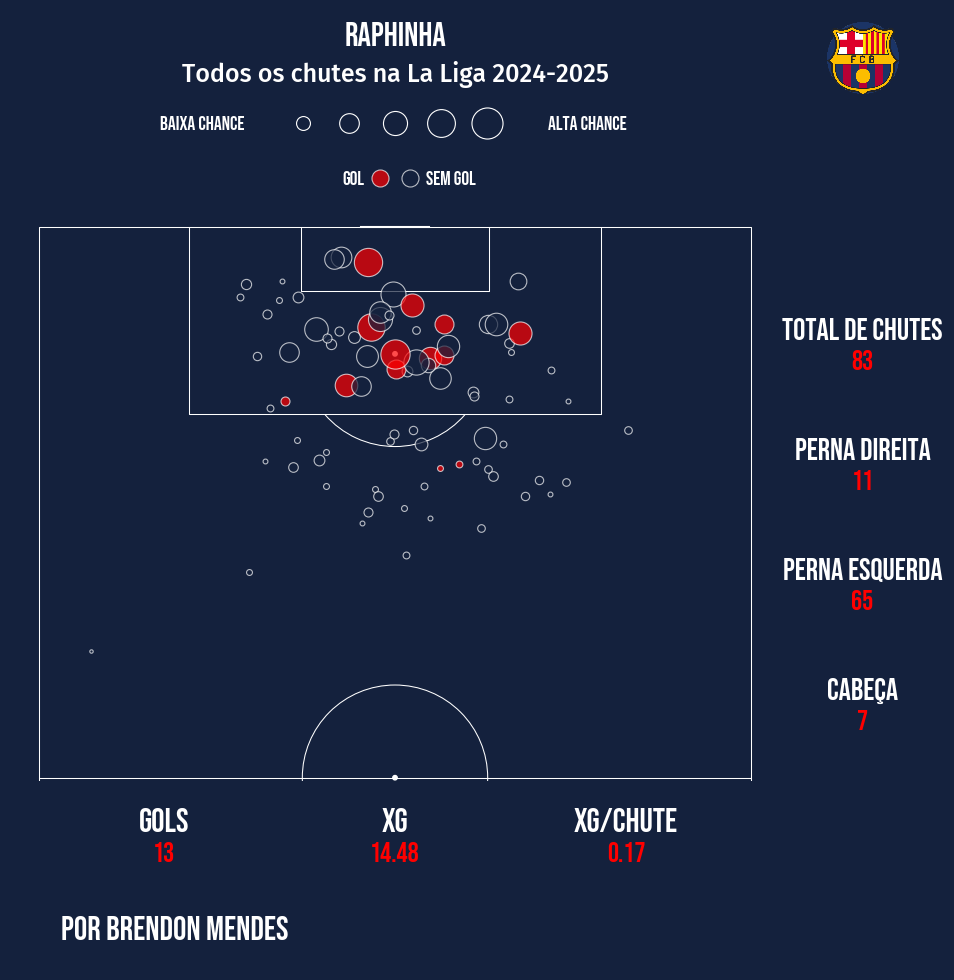

In [250]:
campo = VerticalPitch(
    pitch_type = 'opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True,
    label=True
)

fig = plt.figure(figsize=(11,12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0,0.25,.7,.5])
ax1.set_facecolor(background_color)
ax1.set_axis_off()

campo.draw(ax=ax1)

ax2 = fig.add_axes([0,0.7,.7,.2])
ax2.set_facecolor(background_color)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)



ax2.text(
    x=0.5,
    y=.85,
    s='Raphinha',
    fontsize = 24,
    fontproperties=font,
    fontweight='bold',
    color='white',
    ha='center'
)

ax2.text(
    x=0.5,
    y=.7,
    s=f'Todos os chutes na La Liga 2024-2025',
    fontsize=18,
    fontproperties=other_bold_font,
    fontweight='bold',
    color='white',
    ha='center'
)

ax2.text(
    x=0.25,
    y=.5,
    s=f'Baixa chance',
    fontsize=14,
    fontproperties=font,
    color='white',
    ha='center'
)

ax2.scatter(
    x=0.38,
    y=0.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax2.scatter(
    x=0.44,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax2.scatter(
    x=0.5,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax2.scatter(
    x=0.56,
    y=0.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax2.scatter(
    x=0.62,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax2.text(
    x=0.75,
    y=0.5,
    s=f'Alta chance',
    color='white',
    fontsize=14,
    fontproperties=font,
    ha='center'
)

ax2.text(
    x=.46,
    y=.27,
    s='Gol',
    fontsize=14,
    fontproperties=font,
    color='white',
    ha='right'
)

ax2.scatter(
    x=.48,
    y=.3,
    s=150,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)

ax2.scatter(
    x=.52,
    y=.3,
    s=150,
    color=background_color,
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)

ax2.text(
    x=.54,
    y=.27,
    s='Sem gol',
    fontproperties=font,
    fontsize=14,
    color='white',
    ha='left'
)

for x in shots.to_dict(orient='records'):
    campo.scatter(
        x['X'],
        x['Y'],
        s=600 * x['xG'],
        color = 'red' if x['result'] == 'Goal' else background_color,
        edgecolor='white',
        linewidth = .8,
        alpha=.7,
        ax=ax1
    )

ax2.set_axis_off()

ax3 = fig.add_axes([0,.19,.7,.05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)

ax3.text(
    x=.2,
    y=.5,
    s='Gols',
    fontsize=24,
    fontproperties=font,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=.2,
    y=0,
    s=f'{total_gols}',
    fontsize=20,
    color='red',
    ha='center',
    fontproperties=font
)

ax3.text(
    x=.5,
    y=.5,
    s='xG',
    fontsize=24,
    fontproperties=font,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=.5,
    y=0,
    s=f'{total_xG}',
    fontsize=20,
    color='red',
    ha='center',
    fontproperties=font
)

ax3.text(
    x=.8,
    y=.5,
    s='xG/Chute',
    fontsize=24,
    fontproperties=font,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=.8,
    y=0,
    s=f'{total_xG_chute}',
    fontsize=20,
    color='red',
    ha='center',
    fontproperties=font
)

ax3.set_axis_off()

ax4 = fig.add_axes([0.7,.2,.15,.5])
ax4.set_xlim(0,1)
ax4.set_ylim(0,1)
ax4.set_facecolor(background_color)
ax4.set_axis_off()

ax4.text(
    x=.5,
    y=.85,
    s='Total de Chutes',
    fontsize=22,
    fontproperties=font,
    fontweight='bold',
    color='white',
    ha='center'
)

ax4.text(
    x=.5,
    y=.8,
    s=f'{total_chutes}',
    fontsize=20,
    fontproperties=font,
    color='red',
    ha='center'
)

ax4.text(
    x=.5,
    y=.65,
    s='Perna direita',
    fontsize=22,
    fontproperties=font,
    fontweight='bold',
    color='white',
    ha='center'
)

ax4.text(
    x=.5,
    y=.6,
    s=f'{total_direita}',
    fontsize=20,
    fontproperties=font,
    color='red',
    ha='center'
)

ax4.text(
    x=.5,
    y=.45,
    s='Perna Esquerda',
    fontsize=22,
    fontproperties=font,
    fontweight='bold',
    color='white',
    ha='center'
)

ax4.text(
    x=.5,
    y=.4,
    s=f'{total_esquerda}',
    fontsize=20,
    fontproperties=font,
    color='red',
    ha='center'
)

ax4.text(
    x=.5,
    y=.25,
    s='Cabeça',
    fontsize=22,
    fontproperties=font,
    fontweight='bold',
    color='white',
    ha='center'
)

ax4.text(
    x=.5,
    y=.2,
    s=f'{total_cabeca}',
    fontsize=20,
    fontproperties=font,
    color='red',
    ha='center'
)

ax5 = fig.add_axes([0,.1,.3,.05])
ax5.set_facecolor(background_color)
ax5.set_xlim(0,1)
ax5.set_ylim(0,1)

ax5.text(
    x=.5,
    y=.5,
    s='Por Brendon Mendes',
    fontproperties=font,
    fontsize=24,
    ha='center',
    color='white'
)

ax5.set_axis_off()

ax6 = fig.add_axes([.7,.7,.15,.2])
ax6.set_facecolor(background_color)
ax6.set_xlim(0,1)
ax6.set_ylim(0,1)
img = matplotlib.offsetbox.OffsetImage(plt.imread('barcelona.png'),zoom=.0999)
ax6.add_artist(matplotlib.offsetbox.AnnotationBbox(img,(.5,.8),frameon=False))
ax6.set_axis_off()

plt.savefig('./ShotMapRaphinha',pad_inches='0')